In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
import os
#os.getcwd()
os.chdir('/home/bfrison/pet_finder')

In [3]:
df = pd.read_csv('train.csv', dtype={'AdoptionSpeed':'O'})
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [5]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000


In [6]:
df_color_labels = pd.read_csv('color_labels.csv')
color_labels_dict = dict()
color_labels_dict.update(zip(df_color_labels['ColorID'], df_color_labels['ColorName']))
df['Color1_labelled'] = df['Color1'].map(color_labels_dict)
df['Color2_labelled'] = df['Color2'].map(color_labels_dict)
df['Color3_labelled'] = df['Color3'].map(color_labels_dict)

df_breeds_labels = pd.read_csv('breed_labels.csv')
breed_labels_dict = dict()
breed_labels_dict.update(zip(df_breeds_labels['BreedID'], df_breeds_labels['BreedName']))
df['Breed1_labelled'] = df['Breed1'].map(breed_labels_dict)
df['Breed2_labelled'] = df['Breed2'].map(breed_labels_dict)

In [7]:
print(df['AdoptionSpeed'].describe())


count     14993
unique        5
top           4
freq       4197
Name: AdoptionSpeed, dtype: object


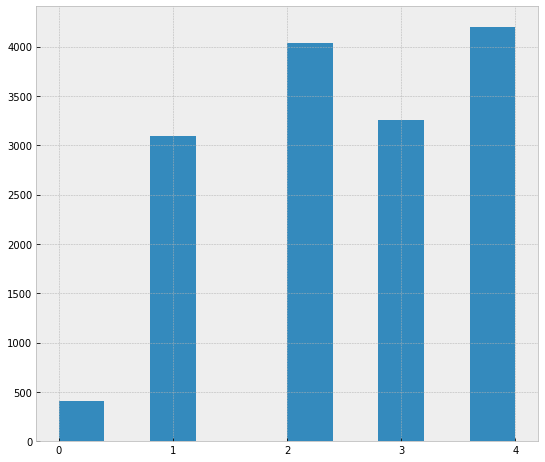

In [8]:
plt.figure(figsize=(9, 8))
# df['AdoptionSpeed'].hist(bins=5)
df['AdoptionSpeed'].sort_values().hist()

In [9]:
df.dtypes
# list(set(df.dtypes.tolist()))

Type                 int64
Name                object
Age                  int64
Breed1               int64
Breed2               int64
Gender               int64
Color1               int64
Color2               int64
Color3               int64
MaturitySize         int64
FurLength            int64
Vaccinated           int64
Dewormed             int64
Sterilized           int64
Health               int64
Quantity             int64
Fee                  int64
State                int64
RescuerID           object
VideoAmt             int64
Description         object
PetID               object
PhotoAmt           float64
AdoptionSpeed       object
Color1_labelled     object
Color2_labelled     object
Color3_labelled     object
Breed1_labelled     object
Breed2_labelled     object
dtype: object

In [10]:
df_dogs = df[df['Type'] == 1]
df_cats = df[df['Type'] == 2]
df_adopt = []
for i in range(5):
    df_adopt.append(df[df['AdoptionSpeed'] == str(i)])
df_dogs_adopt = []
for i in range(5):
    df_dogs_adopt.append(df_dogs[df_dogs['AdoptionSpeed'] == str(i)])
df_cats_adopt = []
for i in range(5):
    df_cats_adopt.append(df_cats[df_cats['AdoptionSpeed'] == str(i)])

Text(0.5, 1.0, 'Cats Adotion Speeds')

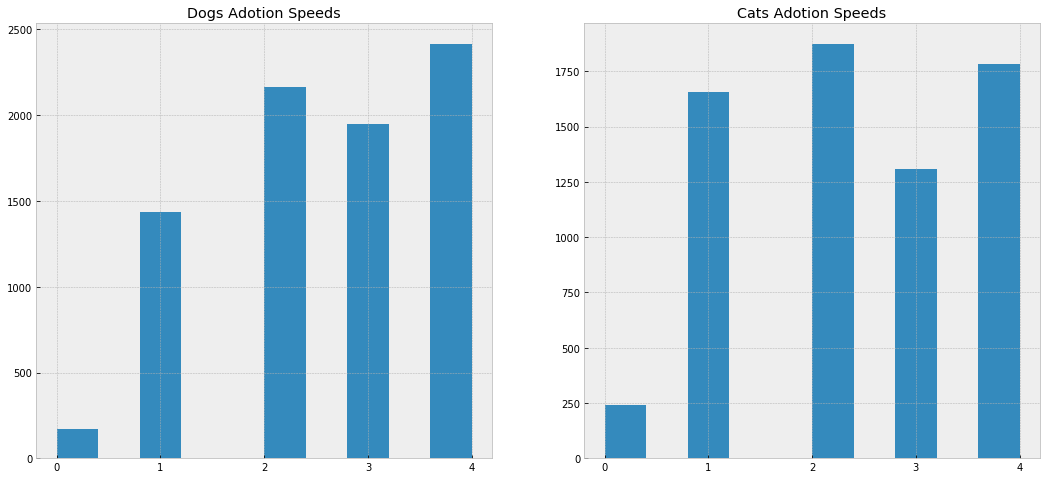

In [11]:
fig_hist, ax_hist = plt.subplots(1, 2, figsize=(18, 8))
ax_hist_dogs = ax_hist[0]
df_dogs['AdoptionSpeed'].sort_values().hist(ax=ax_hist_dogs)
ax_hist_dogs.set_title('Dogs Adotion Speeds')
ax_hist_cats = ax_hist[1]
df_cats['AdoptionSpeed'].sort_values().hist(ax=ax_hist_cats)
ax_hist_cats.set_title('Cats Adotion Speeds')

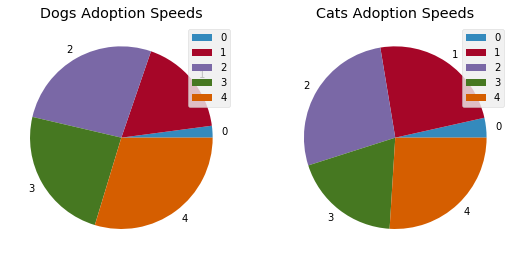

In [12]:
fig_pie, axes_pie = plt.subplots(1, 2, figsize=(9,16))
ax_pie_dogs = axes_pie[0]
ax_pie_dogs.pie(df_dogs['AdoptionSpeed'].value_counts().sort_index(), 
    labels=df_dogs['AdoptionSpeed'].value_counts().sort_index().index.tolist())
ax_pie_dogs.set_title('Dogs Adoption Speeds')
legend = ax_pie_dogs.legend()
ax_pie_cats = axes_pie[1]
ax_pie_cats.pie(df_cats['AdoptionSpeed'].value_counts().sort_index(), 
    labels=df_cats['AdoptionSpeed'].value_counts().sort_index().index.tolist())
ax_pie_cats.set_title('Cats Adoption Speeds')
legend = ax_pie_cats.legend()

[None, Text(0.5, 1.0, 'Cats')]

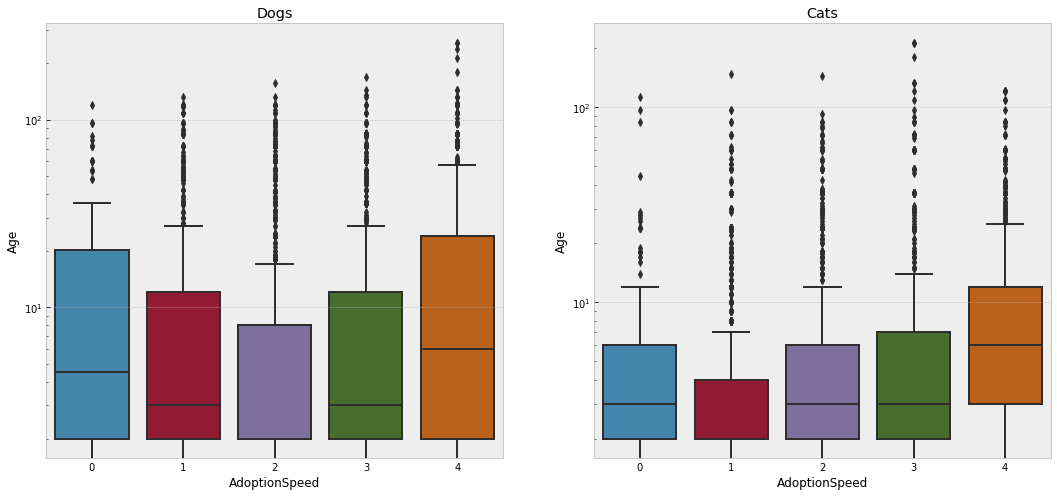

In [13]:
fig, ax_lst = plt.subplots(1, 2, figsize=(18,8))
ax1 = sns.boxplot(x='AdoptionSpeed', y='Age', ax=ax_lst[0], data=df_dogs)    
ax2 = sns.boxplot(x='AdoptionSpeed', y='Age', ax=ax_lst[1], data=df_cats)    
ax1.set(yscale='log', title='Dogs')    
ax2.set(yscale='log', title='Cats')

[None, Text(0.5, 1.0, 'Cats')]

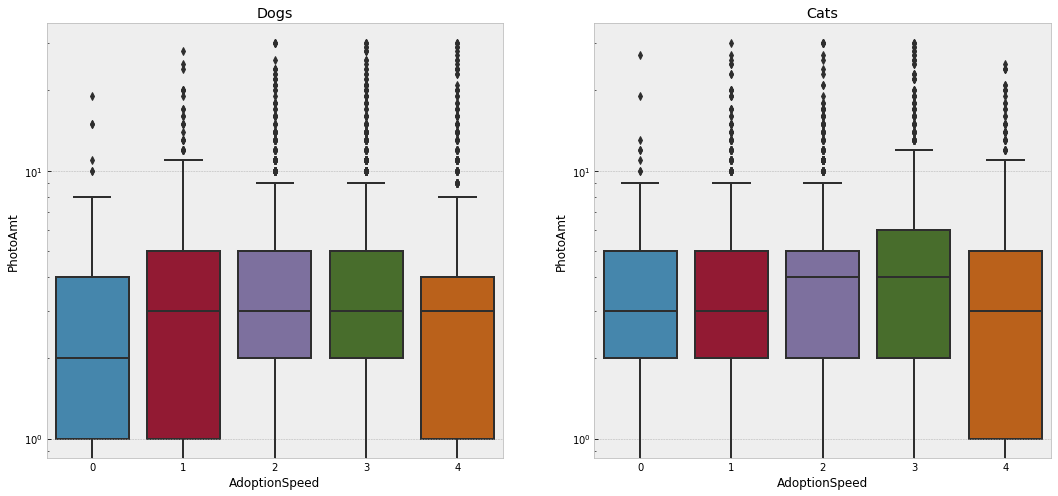

In [14]:
fig2, ax_lst2 = plt.subplots(1, 2, figsize=(18,8))
ax3 = sns.boxplot(x='AdoptionSpeed', y='PhotoAmt', ax=ax_lst2[0], data=df_dogs)
ax4 = sns.boxplot(x='AdoptionSpeed', y='PhotoAmt', ax=ax_lst2[1], data=df_cats)
ax3.set(yscale='log', title='Dogs')    
ax4.set(yscale='log', title='Cats')

Text(0.5, 1.0, 'Cats')

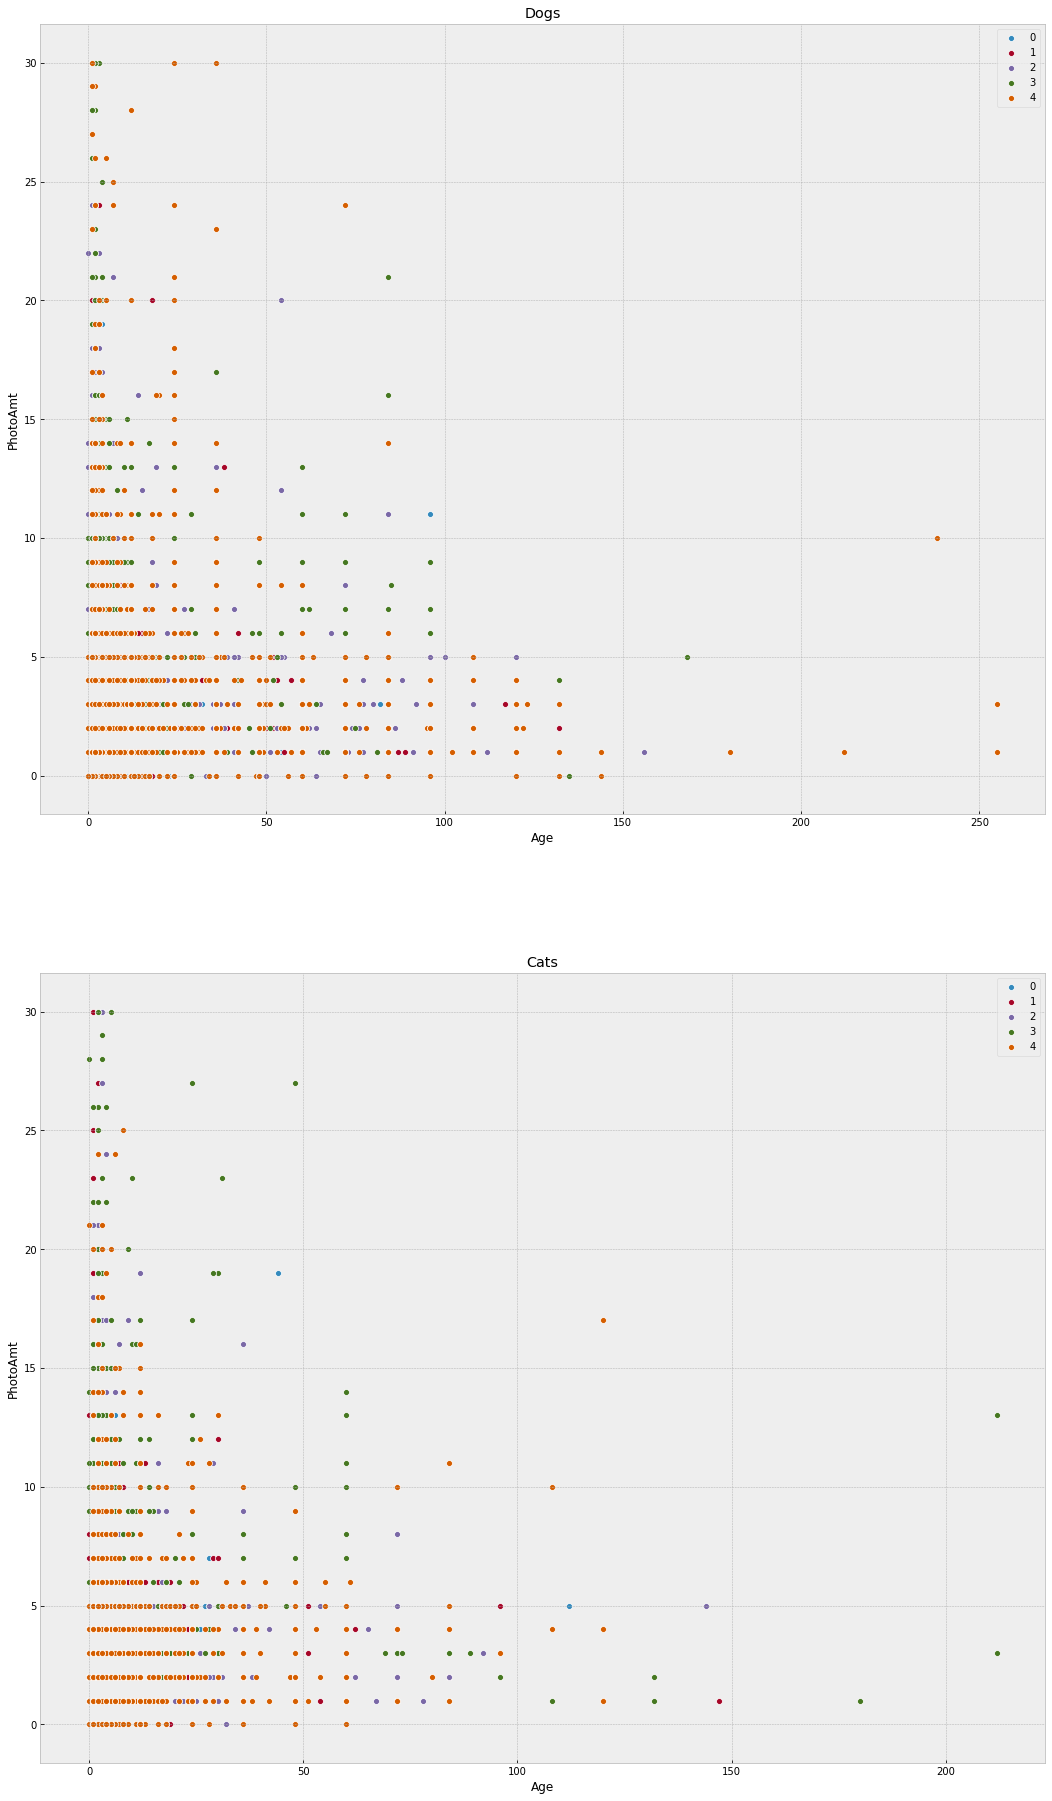

In [15]:
fig3, ax_list3 = plt.subplots(2, 1, figsize=(18,32))
for speed, df_adopt in enumerate(df_dogs_adopt):
    sns.scatterplot(x='Age', y='PhotoAmt', data=df_adopt, label = speed, ax=ax_list3[0])
ax_list3[0].set_title('Dogs')
for speed, df_adopt in enumerate(df_cats_adopt):
    sns.scatterplot(x='Age', y='PhotoAmt', data=df_adopt, label = speed, ax=ax_list3[1])
ax_list3[1].set_title('Cats')

In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_dogs = df_dogs.select_dtypes(include = ['float64', 'int64'])
df_num_cats = df_cats.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0


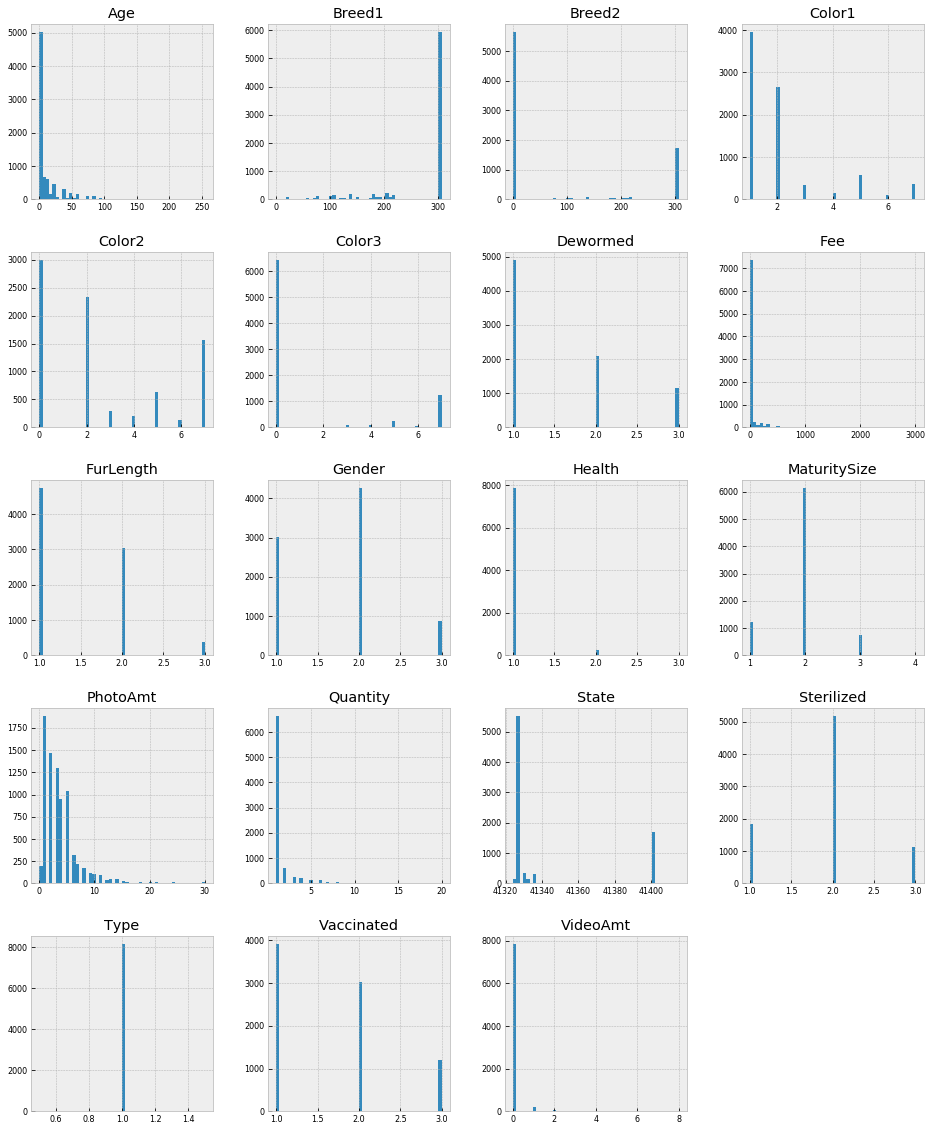

In [17]:
df_num_dogs.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

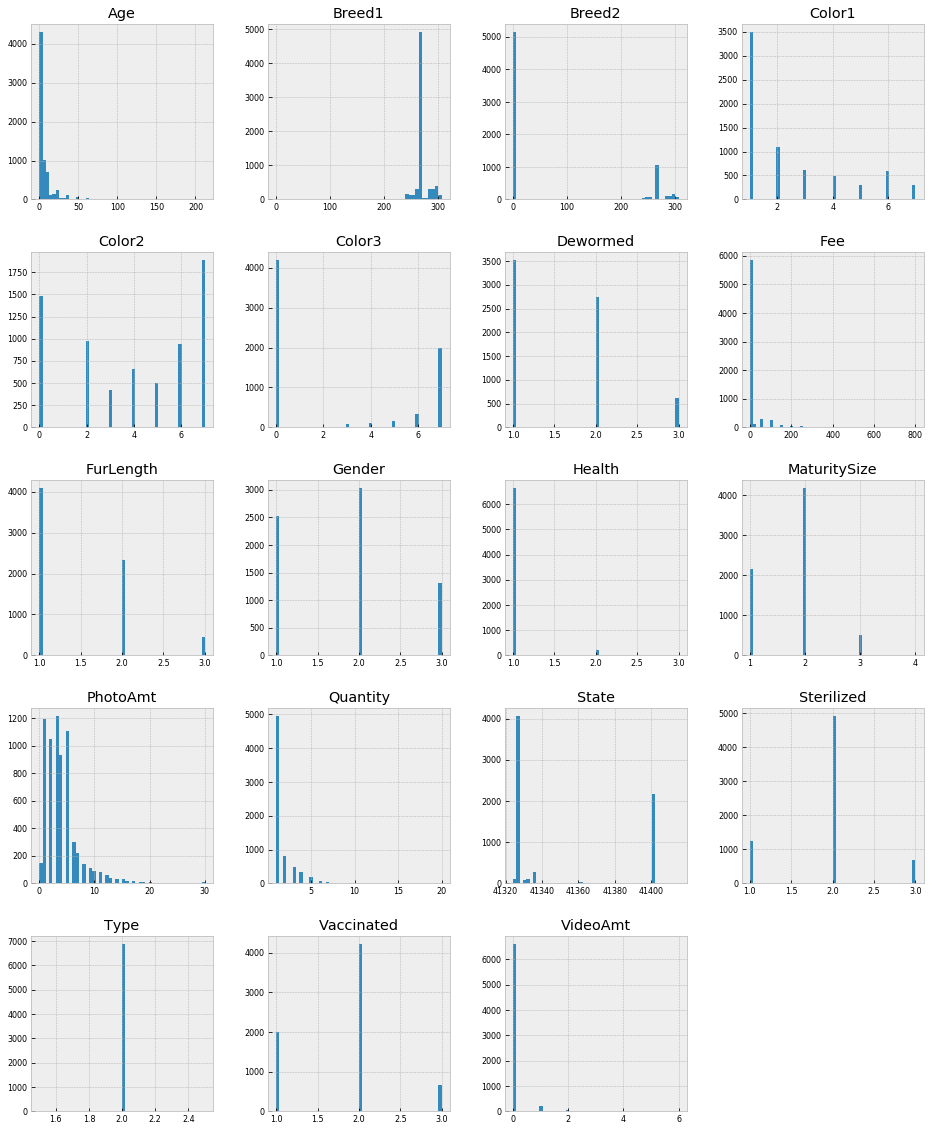

In [18]:
df_num_cats.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

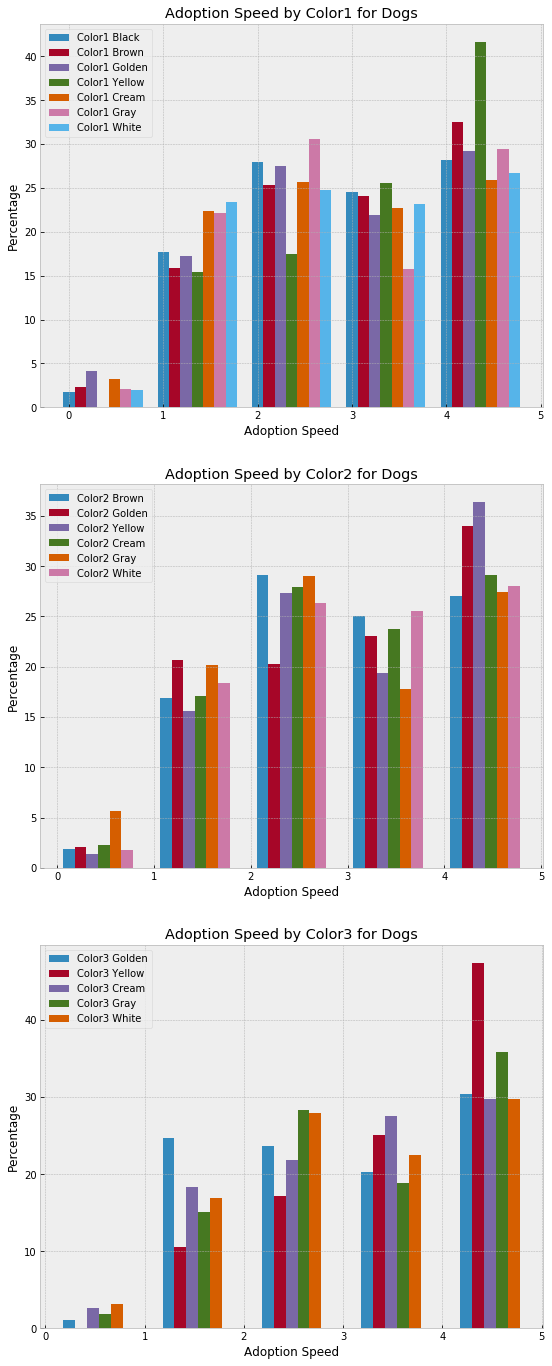

In [19]:
fig_color_dogs, axes_color_dogs = plt.subplots(3, 1, figsize=(9,24))
bar_width = 0.12
for i in range(len(axes_color_dogs)):
    ax = axes_color_dogs[i]
    for j in range(7):
        df_color = df_dogs[df_dogs[f'Color{i+1}'] == j + 1]
        if len(df_color):
            df_color_adopt = [df_color[df_color['AdoptionSpeed'] == str(k)] for k in range(5)]
            ax.bar(np.arange(len(df_color_adopt)) + j * bar_width, 
                [100 * len(speed)/len(df_color) for speed in df_color_adopt], 
                bar_width, label=f'Color{i+1} {color_labels_dict[j+1]}')
    ax.set(xlabel='Adoption Speed', ylabel='Percentage')
    ax.legend()
    ax.set_title(f'Adoption Speed by Color{i+1} for Dogs')

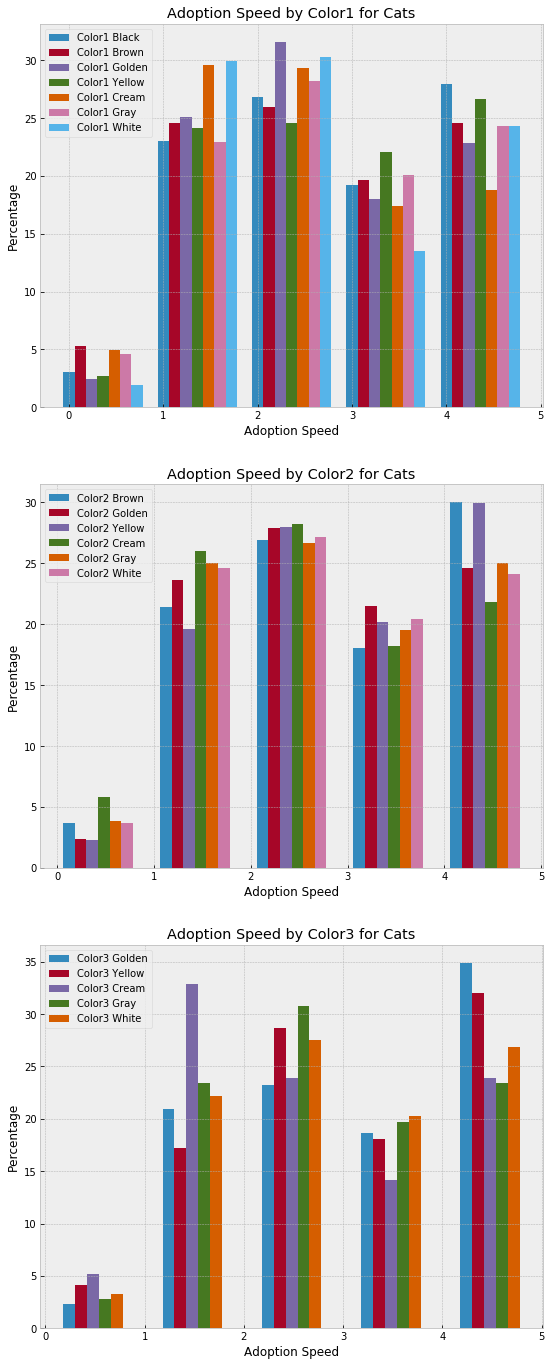

In [20]:
fig_color_cats, axes_color_cats = plt.subplots(3, 1, figsize=(9,24))
bar_width = 0.12
for i in range(len(axes_color_cats)):
    ax = axes_color_cats[i]
    for j in range(7):
        df_color = df_cats[df_cats[f'Color{i+1}'] == j + 1]
        if len(df_color):
            df_color_adopt = [df_color[df_color['AdoptionSpeed'] == str(k)] for k in range(5)]
            ax.bar(np.arange(len(df_color_adopt)) + j * bar_width, 
                [100 * len(speed)/len(df_color) for speed in df_color_adopt], 
                bar_width, label=f'Color{i+1} {color_labels_dict[j+1]}')
    ax.set(xlabel='Adoption Speed', ylabel='Percentage')
    ax.legend()
    ax.set_title(f'Adoption Speed by Color{i+1} for Cats')

In [21]:
# fig_breed_dogs, axes_breed_dogs = plt.subplots(2, 1, figsize=(9,16))
# bar_width = 0.12
# for i in range(len(axes_breed_dogs)):
#     ax = axes_breed_dogs[i]
#     for j in range(1, 307):
#         df_breed = df_dogs[df_dogs[f'Breed{i+1}'] == j + 1]
#         if len(df_breed) >= 750:
#             df_breed_adopt = [df_breed[df_breed['AdoptionSpeed'] == str(k)] for k in range(5)]
#             ax.bar(np.arange(len(df_breed_adopt)) + j * bar_width, 
#                 [len(speed) for speed in df_breed_adopt],
#                 bar_width, label=f'Breed{i+1} {breed_labels_dict[j+1]}')
#             # ax.bar(np.arange(len(df_color_adopt)) + j * bar_width, 
#             #     [100 * len(speed)/len(df_color) for speed in df_color_adopt], 
#             #     bar_width, label=f'Color{i+1} {color_labels_dict[j+1]}')
#     ax.set(xlabel='Adoption Speed', ylabel='Percentage')
#     ax.set_title(f'Adoption Speed by Breed{i+1} for Dogs')